In [39]:
# Purpose: Plotting CTD data 
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #                         
#     Maurice F. Huguenin, m.huguenin-virchaux@unsw.edu.au, 10. 05. 2021      #                                                
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

# % preamble ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #                         
save = 'Y:/Maurice Huguenin/in2021_v3/figures/'

import xarray as xr # for working with labelled multi-dimensional arrays                                                                
import numpy as np # for numerical operations                                                           
import cmocean as cm
from datetime import datetime # package for printing time in plot                                       
import string # for subplot annotation                                                                  
import matplotlib.pyplot as plt # for matlab-like plotting                                              
import cartopy.crs as ccrs # for maps     
import itertools
import pandas as pd
import cmocean
from matplotlib import gridspec
from matplotlib import ticker
import cartopy.mpl.ticker as cticker
import matplotlib.dates as mdates
import string # for subplot annotation
import cartopy.feature as cfeature
from matplotlib import gridspec
import gsw

import cftime

from dask.distributed import Client
client = Client(n_workers=4)         # careful: do not run with 48 workers here as it will crash
client
rotblau = [[0.4 , 0.  , 0.12], [0.47, 0.02, 0.13], [0.62, 0.07, 0.16], [0.66, 0.16, 0.2],
           [0.8 , 0.3 , 0.27], [0.87, 0.44, 0.35], [0.93, 0.58, 0.45], [0.96, 0.7 , 0.58], 
           [0.98, 0.8 , 0.71], [0.98, 0.94, 0.92], [0.93, 0.95, 0.96], [0.85, 0.91, 0.95],
           [0.76, 0.87, 0.93], [0.64, 0.8 , 0.89], [0.49, 0.72, 0.84], [0.34, 0.62, 0.79], 
           [0.23, 0.53, 0.74], [0.16, 0.44, 0.7] , [0.1 ,0.35, 0.6], [0.05, 0.24, 0.45], [0.02, 0.19, 0.38]]

### Adding the CTD plots from the rapid cast line together

Creating figure for CTD in2021_v03017CtdAvg
Creating figure for CTD in2021_v03018CtdAvg
Creating figure for CTD in2021_v03019CtdAvg
Creating figure for CTD in2021_v03020CtdAvg
Creating figure for CTD in2021_v03021CtdAvg
Creating figure for CTD in2021_v03022CtdAvg
Creating figure for CTD in2021_v03023CtdAvg
Creating figure for CTD in2021_v03024CtdAvg
Wall time: 7.07 s


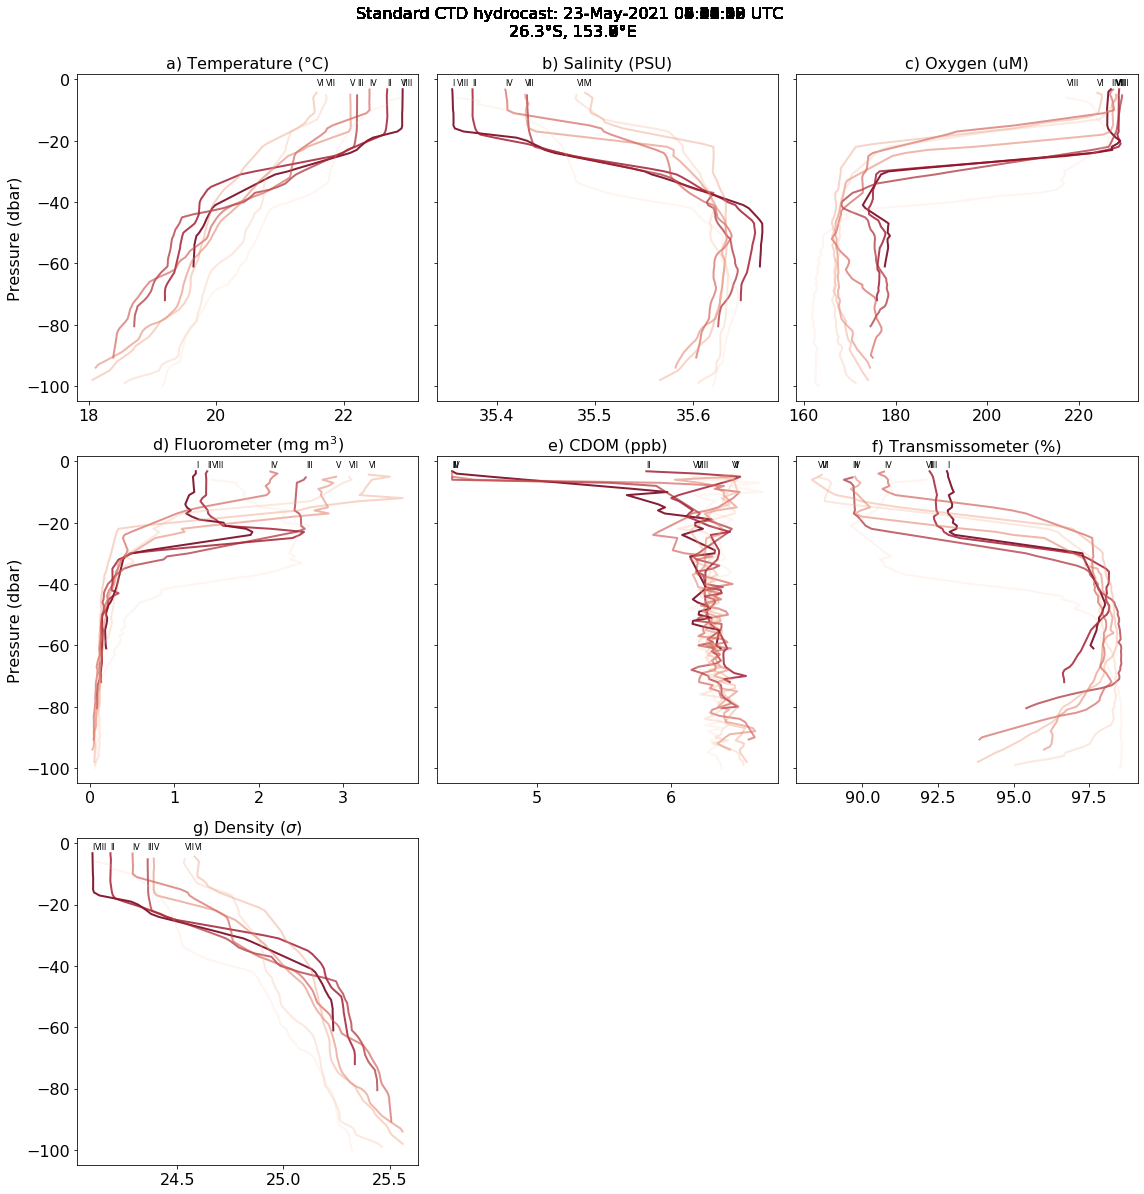

In [37]:
%%time
import warnings
warnings.filterwarnings("ignore")

base = 'W:/in2021_v03/ctd/processing/in2021_v03/cap/cappro/avg/'

# initialise figure
fig = plt.figure(figsize=(16,16),tight_layout=True,facecolor='w',edgecolor='k')
gs = gridspec.GridSpec(3,3, width_ratios = [1,1,1])
    
roman = ['I','II','III','IV','V','VI','VII','VIII','IX','X']
alfas = [1,.9,.8,.7,.6,.5,.4,.3,.2,.1,.1]

for s in range(17, 25, 1): # start, stop-1, step

    print('Creating figure for CTD ' + 'in2021_v030' + str(s) + 'CtdAvg') # if CTD cast > 10, then
    CTD = xr.open_dataset(base + 'in2021_v030' + str(s) + 'CtdAvg.nc') # string only v03010, v2011, ect.

    vars = [str(CTD.temperature.standard_name) + ' (°C)',
            str(CTD.salinity.standard_name) + ' (' + str(CTD.salinity.units) + ')',
            str(CTD.oxygen.standard_name) + ' (' + str(CTD.oxygen.units) + ')',
            str(CTD.fluorometer.standard_name) + ' (mg m$^3$)',   
            str(CTD.cdom.standard_name) + ' (' + str(CTD.cdom.units) + ')',   
            str(CTD.transmissometer.standard_name) + ' (' + str(CTD.transmissometer.units) + ')',   
            'Density ($\sigma$)']

    for f in range(7):
        if f == 0:
            data = CTD.temperature; panel = gs[0,0]; farbe = 'red'
        if f == 1:
            data = CTD.salinity; panel = gs[0,1]; farbe = 'green'
        if f == 2:
            data = CTD.oxygen; panel = gs[0,2]; farbe = rotblau[s-17+1]
        if f == 3:
            data = CTD.fluorometer; panel = gs[1,0]; farbe = rotblau[s-17+1]
        if f == 4:
            data = CTD.cdom; panel = gs[1,1]; farbe = rotblau[s-17+1]
        if f == 5:
            data = CTD.transmissometer; panel = gs[1,2]; farbe = rotblau[s-17+1]
        if f == 6:
            data = gsw.rho(CTD.salinity,CTD.temperature,0); panel = gs[2,0]; farbe = rotblau[s-17+1]            
            data = data - 1000 # convert to PSU by removing 1000 kg/m3      

        ax1 = plt.subplot(panel)
        plt.plot(data[0,0,0:95,0], -CTD.pressure[0:95], color=rotblau[s-17+1], linewidth=2, alpha=alfas[s-17+1])
#        ax1.axes.invert_yaxis()
        plt.yticks(fontsize=16); plt.xticks(fontsize=16) # ticklabel  size
        plt.locator_params(axis='x', nbins=8) # number of ticks on x axis
        plt.title(string.ascii_lowercase[f]+') ' + vars[f], fontsize = 16, loc='center') # add title

        plt.text(data[0,0,0,0],-2,roman[s-17], fontsize=8)
    
#        ax1.set_xticks(ax1.get_xticks()[::2])
        plt.locator_params(axis='x', nbins=5)
        if f in [0,3]: plt.ylabel('Pressure (dbar)', fontsize=16) # axis labels
        if f in [1,2,4,5]:
            ax1.set_yticklabels([])
        if s == 2: # if the third CTD cast, add the bottled samples as well
            ax2 = plt.plot(oxygen, pressure, linewidth=.5, color= rotblau[3], alpha = .5)
            ax2 = plt.plot(oxygen, pressure, marker = '*', linestyle='none', color= rotblau[3])
        
#        plt.ylim(bottom=100)  # adjust the bottom leaving top unchanged

        # plot over the full figure
        plt.figtext(.5, 1.02, CTD.DeploymentType + ': ' + CTD.StartTime + ' UTC \n' +
                    "%.1f" % np.abs(CTD.latitude.values)+'°S, '+"%.1f" % np.abs(CTD.longitude.values)+'°E',
                    ha='center', va='center', fontsize=16)
        
# save figure
plt.savefig('X:/FIGURES/' + 'CTD_Hydrocast_CTD_line_together_all_eight', dpi=300, facecolor='w',
            edgecolor='w', orientation='landscape',
            format=None, transparent=False, bbox_inches='tight', 
            pad_inches=0.1, metadata=None)
# --- end of script --------------------------------------------------------- #

In [35]:
gsw.rho(CTD.salinity,CTD.temperature,0)

<xarray.DataArray (longitude: 1, latitude: 1, pressure: 255, time: 1)>
array([[[[1024.112452],
         ...,
         [1026.081032]]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-05-23T09:36:20.307002880
  * pressure   (pressure) float64 6.0 7.0 8.0 9.0 ... 257.0 258.0 259.0 260.0
  * latitude   (latitude) float64 -26.34
  * longitude  (longitude) float64 153.9

### Plotting a TS-Diagram

In [38]:
%%time
# load in temperature and salinity at the very beginning of the trend, i.e. in 2006-01

temp = CTD.temperature.values.reshape(1,-1)[0] - 273.15 # convert to degrees C
salt = CTD.salinity.values.reshape(1,-1)[0]
density = (gsw.rho(CTD.salinity,CTD.temperature,0)-1000).values.reshape(1,-1)[0]

# Default plot ranges:
y_range = (-2, 31) # temperature
x_range = (28,38) # salinity

df = pd.DataFrame({'temp': temp, 'salt' : salt, 'density' : density}, copy=False)

def create_image(x_range=x_range, y_range=y_range, w=500, h=500):
    cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=h, plot_width=w)
    agg = cvs.points(df, 'salt', 'temp', ds.mean('OHC'))
    return tf.shade(agg)


cvs = ds.Canvas(plot_width=500, plot_height=500, x_range=x_range, y_range=y_range)
agg2 = cvs.points(df, 'salt', 'temp')

img = tf.shade(agg2, cmap=plt.cm.YlOrRd)
img

# Wall time: 28.6 s

NameError: name 'ds' is not defined

### Doing the three shallow CTDs (2nd round)

27
Creating figure for CTD in2021_v03027CtdAvg
28
Creating figure for CTD in2021_v03028CtdAvg
31
Creating figure for CTD in2021_v03031CtdAvg
Wall time: 3.98 s


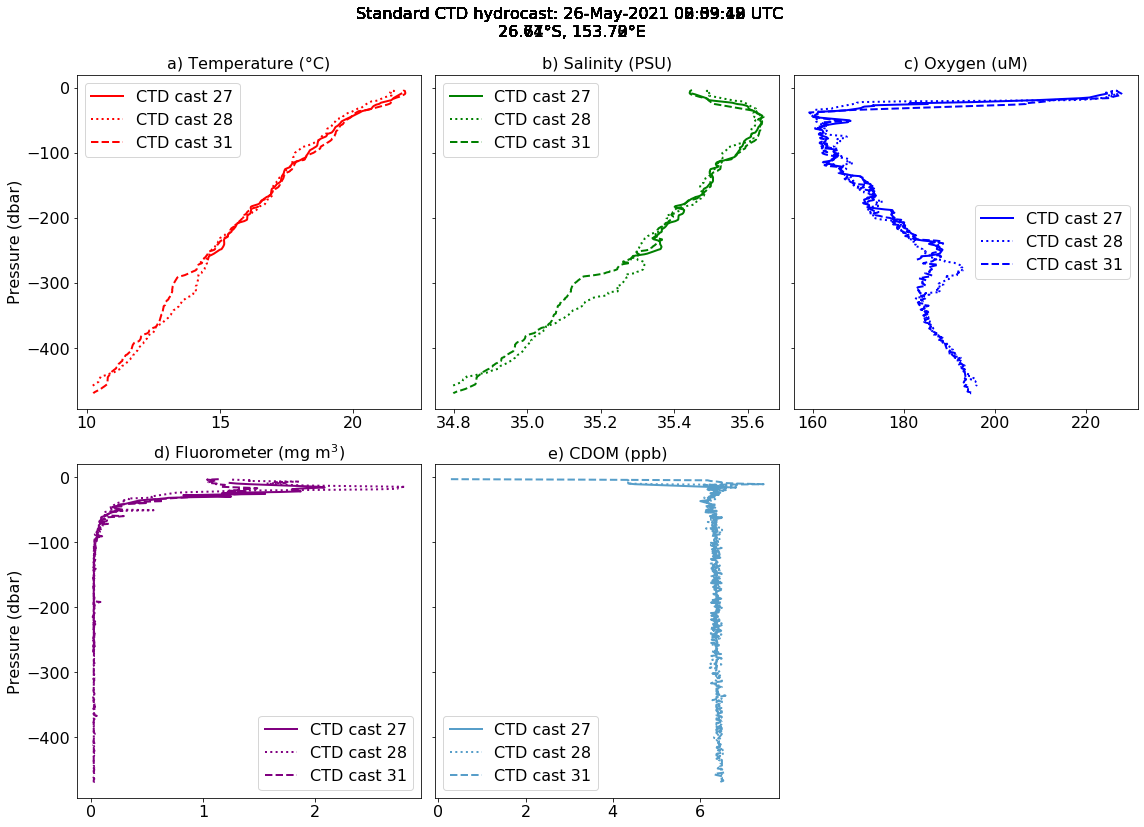

In [6]:
%%time
import warnings
warnings.filterwarnings("ignore")

base = 'W:/in2021_v03/ctd/processing/in2021_v03/cap/cappro/avg/'

# initialise figure
fig = plt.figure(figsize=(16,16),tight_layout=True,facecolor='w',edgecolor='k')
gs = gridspec.GridSpec(3,3, width_ratios = [1,1,1])
    
roman = ['I','II','III','III','III','III']
alfas = [1,.66,.33,.33,.33,.33]
style = ['solid','dotted','dashed','dashed','dashed']

for s in [27,28,31]: # start, stop-1, step
    print(s)
    print('Creating figure for CTD ' + 'in2021_v030' + str(s) + 'CtdAvg') # if CTD cast > 10, then
    CTD = xr.open_dataset(base + 'in2021_v030' + str(s) + 'CtdAvg.nc') # string only v03010, v2011, ect.

    vars = [str(CTD.temperature.standard_name) + ' (°C)',
            str(CTD.salinity.standard_name) + ' (' + str(CTD.salinity.units) + ')',
            str(CTD.oxygen.standard_name) + ' (' + str(CTD.oxygen.units) + ')',
            str(CTD.fluorometer.standard_name) + ' (mg m$^3$)',   
            str(CTD.cdom.standard_name) + ' (' + str(CTD.cdom.units) + ')',   
            str(CTD.transmissometer.standard_name) + ' (' + str(CTD.transmissometer.units) + ')']

    

    for f in range(5):
        if f == 0:
            data = CTD.temperature; panel = gs[0,0]; farbe = 'red'
        if f == 1:
            data = CTD.salinity; panel = gs[0,1]; farbe = 'green'
        if f == 2:
            data = CTD.oxygen; panel = gs[0,2]; farbe = 'blue'
        if f == 3:
            data = CTD.fluorometer; panel = gs[1,0]; farbe = 'purple'
        if f == 4:
            data = CTD.cdom; panel = gs[1,1]; farbe = rotblau[15]
        if f == 5:
            data = CTD.transmissometer; panel = gs[1,2]; farbe = rotblau[12]
            
            
        ax1 = plt.subplot(panel)
        plt.plot(data[0,0,:,0], -CTD.pressure, color=farbe, linewidth=2, linestyle=style[s-27],
                 label = 'CTD cast ' + str(s))
#        ax1.axes.invert_yaxis()
        plt.yticks(fontsize=16); plt.xticks(fontsize=16) # ticklabel  size
        plt.locator_params(axis='x', nbins=8) # number of ticks on x axis
        plt.title(string.ascii_lowercase[f]+') ' + vars[f], fontsize = 16, loc='center') # add title

        plt.legend(fontsize=16)
#        plt.text(data[0,0,0,0],-3,roman[s-27], fontsize=12)
    
#        ax1.set_xticks(ax1.get_xticks()[::2])
        plt.locator_params(axis='x', nbins=5)
        if f in [0,3]: plt.ylabel('Pressure (dbar)', fontsize=16) # axis labels
        if f in [1,2,4,5]:
            ax1.set_yticklabels([])

        
#        plt.ylim(bottom=100)  # adjust the bottom leaving top unchanged

        # plot over the full figure
        plt.figtext(.5, 1.02, CTD.DeploymentType + ': ' + CTD.StartTime + ' UTC \n' +
                    "%.2f" % np.abs(CTD.latitude.values)+'°S, '+"%.2f" % np.abs(CTD.longitude.values)+'°E',
                    ha='center', va='center', fontsize=16)
        
# save figure
plt.savefig('X:/FIGURES/' + 'CTD_Hydrocast_CTD_line_together_short', dpi=300, facecolor='w',
            edgecolor='w', orientation='landscape',
            format=None, transparent=False, bbox_inches='tight', 
            pad_inches=0.1, metadata=None)
# --- end of script --------------------------------------------------------- #

### Now the same transects in depth-latitude space

CTD cast: 027
['2021-05-26T00:59:49.175000064']
--- --- --- --- ---
CTD cast: 028
['2021-05-26T02:03:42.757002752']
--- --- --- --- ---
CTD cast: 031
['2021-05-26T08:39:18.424004096']
--- --- --- --- ---
Wall time: 4.72 s


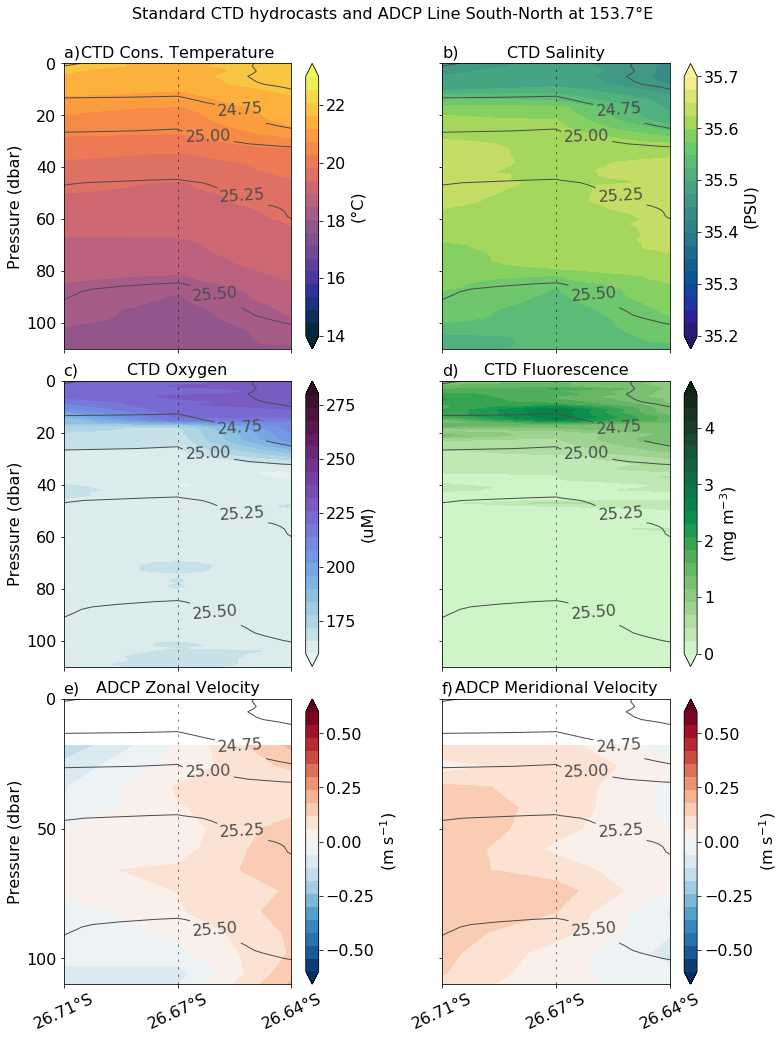

In [7]:
%%time
base2 = 'W:/in2021_v03/adcp/uhdas/proc/os150nb/contour/' # path to ADCP data set

CTD8 = xr.open_dataset(base + 'in2021_v030' + str(31) + 'CtdAvg.nc') # open reference data set with the deepest depth

temp  = np.zeros(shape=(len(CTD8.pressure.values),3)) # get the data structure, eight rows with x number of values in depth
sal   = np.zeros(shape=(len(CTD8.pressure.values),3))  # next, we will fill in these empty arrays
oxy   = np.zeros(shape=(len(CTD8.pressure.values),3))
fluor = np.zeros(shape=(len(CTD8.pressure.values),3))

ds = xr.open_dataset(base2 + 'os150nb.nc') # the ADCP data set
depth = xr.open_dataset(base2 + 'os150nb.nc').depth[0,:] # depth from the ADCP
X, Y = np.meshgrid(depth,[0,1,2]) # create 2-D meshgrids of depth and the eight longitude values from the CTD

u = np.zeros(shape=(3, len(depth))) # empty arrays that get filled up
v = np.zeros(shape=(3, len(depth)))


# initalise empty longitude array which gets filled up
CTD.latitude.values
latitude = np.zeros(shape=(3,1))

for f in [27,28,31]: # cycle through CTD casts #017 to #024
    if f == 27:        r = 0 # have a second loop variable that is continuous
    if f == 28:        r = 1 
    if f == 31:        r = 2
    print('CTD cast: 0' + str(f))
    CTD = xr.open_dataset(base + 'in2021_v030' + str(f) + 'CtdAvg.nc') # string only v03010, v2011, ect.

    
    # fill up the empty arrays with data from the CTD casts 17 to 24
    temp[0:len(CTD.temperature[0,0,:,0]),r] = CTD.temperature[0,0,:,0]
    temp[temp == 0] = 'nan' # set all zeroes to nan
    sal[0:len(CTD.salinity[0,0,:,0]),r] = CTD.salinity[0,0,:,0]
    sal[sal == 0] = 'nan' # set all zeroes to nan
    oxy[0:len(CTD.oxygen[0,0,:,0]),r] = CTD.oxygen[0,0,:,0]
    oxy[oxy == 0] = 'nan' # set all zeroes to nan
    fluor[0:len(CTD.fluorometer[0,0,:,0]),r] = CTD.fluorometer[0,0,:,0]
    fluor[fluor == 0] = 'nan' # set all zeroes to nan
    
    latitude[r] = np.round(CTD.latitude.values,2) # longitude values
    print(CTD.time.values)
    print('--- --- --- --- ---')    

    # select only the ADCP data when we did a CTD cast, i.e., only four vertical columns
    u[r,:] = xr.open_dataset(base2 + 'os150nb.nc').u.sel(time=CTD.time.values, method='nearest')
    v[r,:] = xr.open_dataset(base2 + 'os150nb.nc').v.sel(time=CTD.time.values, method='nearest')

# Create empty grid of zeros for density surfaces
dens = np.zeros(shape=(len(CTD8.pressure.values),3))
# Calculate density
for i in range(len(temp)): # loop over depth levels
    for j in range(3): # loop over CTD casts
        dens[i,j]=gsw.rho(sal[i,j],temp[i,j],0)
dens = dens-1000 # convert to sigma, i.e., subtract 1000 kg/m3 

    
# Color bars for the subplot panels
farbe = [cmocean.cm.thermal, cmocean.cm.haline, cmocean.cm.dense, cmocean.cm.algae,
        'RdBu_r', 'RdBu_r']

# initialise figure
fig = plt.figure(figsize=(11,14),tight_layout=True,facecolor='w',edgecolor='k')
gs = gridspec.GridSpec(3, 2, width_ratios = [1,1])

for s in range(6): # cycle through four subplots

    if s == 0:   # Temperature
        panel = gs[0,0]; data = temp; ticks = np.linspace(14,23,21)
        titel = 'CTD Cons. Temperature'; unit = '°C'
    if s == 1:   # Salinity
        panel = gs[0,1]; data = sal; ticks = np.linspace(35.2,35.7,21)
        titel = 'CTD Salinity'; unit = 'PSU'
    if s == 2:   # Oxygen
        panel = gs[1,0]; data = oxy; ticks = np.linspace(160,280,21)
        titel = 'CTD Oxygen'; unit = 'uM'    
    if s == 3:   # Oxygen
        panel = gs[1,1]; data = fluor; ticks = np.linspace(0,4.6,21)
        titel = 'CTD Fluorescence'; unit = 'mg m$^{-3}$'    
    if s == 4:   # u Velocity
        panel = gs[2,0]; data = u; ticks = np.linspace(-.6,.6,21)
        titel = 'ADCP Zonal Velocity'; unit = 'm s$^{-1}$'   
    if s == 5:   # u Velocity
        panel = gs[2,1]; data = v; ticks = np.linspace(-.6,.6,21)
        titel = 'ADCP Meridional Velocity'; unit = 'm s$^{-1}$'   

        
    ax1 = plt.subplot(panel)
    if s in [0,1,2,3]: # plot contours of CTD data
        plt.contourf(data, CTD.pressure, levels=ticks, cmap=farbe[s], extend='both'); cb = plt.colorbar()

    if s in [4,5]: # add ADCP in panels 5 and 6
        plt.contourf(Y, X, data, levels=ticks, cmap=farbe[s], extend='both'); cb = plt.colorbar()

    # vertical line indicating the eddy center
    ax1.axvline(x=1, linewidth=.5, c = 'k', linestyle=(0,(5,10)))

    
    # plot density contours in dark grey
    p11 = plt.contour(dens, levels = [24,24.25,24.5,24.75,25,25.25,25.5], 
                      linewidths=1.0, colors=[[.3,.3,.3]]) # dark grey colour
    plt.clabel(p11, inline_spacing=1, fontsize=16, fmt="%.2f")


    plt.ylim(top=110)  # adjust the bottom leaving top unchanged
    plt.yticks(fontsize=16); plt.xticks(fontsize=16) # ticklabel  size

    # add subplot label, i.e., a), b), c), d), ...
    ax1.text(0, 1.02, string.ascii_lowercase[s]+')', transform=ax1.transAxes, size=16, weight='normal') # bold letter a at the top
    plt.title(titel, fontsize = 16, loc='center') # title

    cb.set_label(label='('+unit+')', size=16) # colour bar label
    cb.ax.tick_params(labelsize=16); tick_locator = ticker.MaxNLocator(nbins=5) # change parameters for the colour bar
    cb.locator = tick_locator; cb.update_ticks()

    if s in [0,1,2,3]: # adjust the x axis ticks so that they start at 1 instead of 0
        plt.xticks(np.arange(len(temp[0,:])), np.arange(1, len(temp)+1)) # adjust xticklabels so that they start at 1 instead of 0
    plt.gca().invert_yaxis() # invert y-axis
    if s in [4,5]: # custom longitude labels
        plt.locator_params(nbins=3) # three x ticks 
        labels = [item.get_text() for item in ax1.get_xticklabels()] # get x ticks
        labels = [str(abs(latitude[0][0]))+'°S', str(abs(latitude[1][0]))+'°S', str(abs(latitude[2][0]))+'°S']
        
        ax1.set_xticklabels(labels, rotation = 25) # replace labels
#    if s in [2,3]:
#        plt.xlabel('Shallow CTD Cast', fontsize=16) # axis labels
    if s in [0,2,4]: plt.ylabel('Pressure (dbar)', fontsize=16) # axis labels
    if s in [0,1,2,3]: ax1.set_xticklabels([])
    if s in [1,3,5]: ax1.set_yticklabels([])
    
    if s in [4,5]:
        plt.ylim(bottom=110, top=0)  # adjust the bottom leaving top unchanged

#    ax1.axvline(x=5, linewidth=3, c = 'grey')

# plot over the full figure
plt.figtext(.5, 1.02, CTD.DeploymentType + 's and ADCP Line South-North at ' + 
            "%.1f" % np.abs(CTD.longitude.values)+'°E',
            ha='center', va='center', fontsize=16)
        
        
# save figure
plt.savefig('X:/FIGURES/' + 'CTD_Hydrocast_CTD_line_together_3', dpi=300, facecolor='w',
            edgecolor='w', orientation='landscape',
            format=None, transparent=False, bbox_inches='tight', 
            pad_inches=0.1, metadata=None)
# --- end of script ------------------------------------------------------------------- #

### With multiple x axes

In [ ]:
#fig = plt.figure(figsize=(7,14),tight_layout=True,facecolor='w',edgecolor='k')
#gs = gridspec.GridSpec(3,3, width_ratios = [1,1,1])
#
#ax1 = plt.subplot(1,1,1)
#
#ax1.axhline(y= 0, c = 'grey', linewidth = .5, alpha = .9)
#
#ax1.plot(CTD.temperature[0,0,:,0], CTD.pressure, color='red', linewidth=2)
#plt.xlabel('Temperature (°C)', fontsize=16, color='red') 
#plt.yticks(fontsize=16); plt.xticks(fontsize=16, color='red') # ticklabel  size
#plt.ylabel('Pressure (dbar)', fontsize=16) # axis labels
#
#ax2 = ax1.twiny()
#ax2.plot(CTD.conductivity[0,0,:,0], CTD.pressure, color='blue', linewidth=2)
#plt.xlabel('Conductivity (S m$^{-1}$)', fontsize=16, color='blue') 
#plt.yticks(fontsize=16); plt.xticks(fontsize=16, color='blue') # ticklabel  size
#
#ax3 = ax1.twiny()
#ax3.plot(CTD.oxygen[0,0,:,0], CTD.pressure, color='purple', linewidth=2)
#ax3.spines["top"].set_position(("axes", 1.1))
#plt.xlabel('Oxygen (uM)', fontsize=16, color='purple') 
#plt.yticks(fontsize=16); plt.xticks(fontsize=16, color='purple') # ticklabel  size
#
#ax4 = ax1.twiny()
#ax4.plot(CTD.salinity[0,0,:,0], CTD.pressure, color='green', linewidth=2)
#ax4.spines["top"].set_position(("axes", -.15))
#
#plt.xlabel('Salinity (PSU)', fontsize=16, color='green') 
#plt.yticks(fontsize=16); plt.xticks(fontsize=16, color='green') # ticklabel  size
#
# inverse the y-axis so that pressure goes down
#ax1.axes.invert_yaxis(); ax2.axes.invert_yaxis(); ax3.axes.invert_yaxis(); ax4.axes.invert_yaxis()
#
#    # save figure
#    plt.savefig(save + 'CTD_Hydrocast_00'+CTD.Deployment, dpi=300, facecolor='w',
#                edgecolor='w', orientation='landscape',
#                format=None, transparent=False, bbox_inches='tight', 
#                pad_inches=0.1, metadata=None)
#    # --- end of script --------------------------------------------------------- #

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------- #
#                                                   Notes down below                                                      #
# ----------------------------------------------------------------------------------------------------------------------- #

In [ ]:
/